Joe_James 
[youtube](https://www.youtube.com/watch?v=cKlnR-CB3tk) 
[github](https://github.com/joeyajames/Python)

# python map

Joe_James 
[youtube](https://www.youtube.com/watch?v=cKlnR-CB3tk) 
[github](https://github.com/joeyajames/Python)

In [1]:
n = [1,2,3,4]
m = []
for i in n:
    m.append(i**2)    
print(m)    

[1, 4, 9, 16]


In [2]:
n = [1,2,3,4]
m = [k**2 for k in n]
print(type(m), m)

<class 'list'> [1, 4, 9, 16]


In [12]:
import numpy as np
n = np.array([1,2,3,4])
m = n**2
print(type(m), m)

<class 'numpy.ndarray'> [ 1  4  9 16]


In [3]:
n = [1,2,3,4]
def square_function(x): return x**2
m = map(square_function, n)
l = list(map(square_function, n))
print(type(m), m)
print(type(l), l)

<class 'map'> <map object at 0x7f89903b7550>
<class 'list'> [1, 4, 9, 16]


In [4]:
n = [1,2,3,4]
m = map(lambda x: x**2, n)
l = list(map(lambda x: x**2, n))
print(type(m), m)
print(type(l), l)

<class 'map'> <map object at 0x7f89903b7780>
<class 'list'> [1, 4, 9, 16]


# tensorflow map

In [41]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [6]:
graph = tf.Graph()
with graph.as_default():
    n = tf.constant([1,2,3,4], dtype=tf.int32, name='n')
    def square_function(x): return x**2
    m = tf.map_fn(square_function, n)

In [7]:
with tf.Session(graph=graph) as sess:
    print(sess.run(m))

[ 1  4  9 16]


In [8]:
graph2 = tf.Graph()
with graph2.as_default():
    n = tf.constant([1,2,3,4], dtype=tf.int32, name='n')
    m = tf.map_fn(lambda x: x**2, n)

In [9]:
with tf.Session(graph=graph2) as sess:
    print(sess.run(m))

[ 1  4  9 16]


In [10]:
graph3 = tf.Graph()
with graph3.as_default():
    n = tf.placeholder(tf.int32, [4,])
    m = tf.map_fn(lambda x: x**2, n)

In [11]:
with tf.Session(graph=graph3) as sess:
    feed_dict = {n: [1,2,3,4]}
    print(sess.run(m, feed_dict=feed_dict))

[ 1  4  9 16]


In [42]:
def pre_process(img, training):
    """Zooms and crops the image randomly for data augmentation."""
    img = img / 255.
    
    target_height = 50
    target_width = 50
    num_channels = 3
    
    if training:
        img = tf.random_crop(img, size=[target_height, target_width, num_channels]) 
    else:
        img = tf.image.resize_image_with_crop_or_pad(img,
                                                     target_height=target_height,
                                                     target_width=target_width)
    return img

x = tf.placeholder(tf.float32, shape=[None, None, None, 3], name='x')
distorted_images = tf.map_fn(lambda img: pre_process(img, True), x)
resized_images = tf.map_fn(lambda img: pre_process(img, False), x)

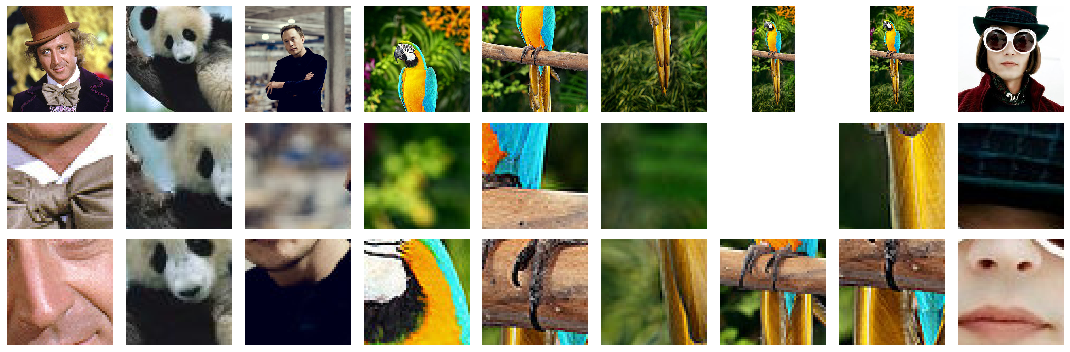

In [45]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
images = []
for i in range(9):
    path = 'images/{}.jpg'.format(str(i))
    images.append(mpimg.imread(path))
distorted_images_run = []
resized_images_run = []
with tf.Session() as sess:
    for i in range(9):
        feed_dict = {x:images[i][None,:,:,:]}
        distorted_images_run.append(sess.run(distorted_images, feed_dict=feed_dict))
        resized_images_run.append(sess.run(resized_images, feed_dict=feed_dict))
fig, axes = plt.subplots(3, 9, figsize=(15,5))  
for i in range(9):
    axes[0,i].imshow(images[i])
    axes[0,i].axis('off')
    axes[1,i].imshow(np.squeeze(distorted_images_run[i]))
    axes[1,i].axis('off')
    axes[2,i].imshow(np.squeeze(resized_images_run[i]))
    axes[2,i].axis('off')
plt.tight_layout()
plt.show()